In [ ]:
map(valorAD_POT, 528., 3235., 0., 180.);

### Converter escala

+ Escala 1:

$$
0 - 180 \\
x_{mim} - x_{max}
$$

+ Escala 2:

$$
528 - 3235 \\
y_{mim} - y_{max}
$$

Fator de conversão (F):

$$
F = \dfrac{x_{mim} - x_{max}}{y_{mim} - y_{max}}
$$


Agora é possível obter a equação para converter entre as escalas:

$$
x_{conv} = ((x_{converter} - x_{min}) \cdot F) + y_{min}
$$

In [8]:
def converte_escala(x_converter, x_min, x_max, y_min, pt=False):
    if abs(x_converter) > x_max:
        m = abs(x_converter) / x_max
    else:
        m = 1.0
    F = (y_min - y_max)/(x_min - x_max)

    if x_converter < 0:
        if x_converter < -x_max:
            x_converter = -x_max
        x_conv = m*(((x_converter - x_min)*F) - y_min)
    else:
        if x_converter > x_max:
            x_converter = x_max
        x_conv = m*(((x_converter - x_min)*F) + y_min)

    if pt:
        print(f"\nValor Original  : {m*x_converter}")
        print(f"Valor Convertido: {x_conv}\n")
    return x_conv


x_min = 0.; x_max = 180.
y_min = 528.; y_max = 3235.


converte_escala(180, x_min=x_min, x_max=x_max, y_min=y_min, pt=True);
converte_escala(-180, x_min=x_min, x_max=x_max, y_min=y_min, pt=True);

converte_escala(180/2, x_min=x_min, x_max=x_max, y_min=y_min, pt=True);
converte_escala(-90, x_min=x_min, x_max=x_max, y_min=y_min, pt=True);


Valor Original  : 180.0
Valor Convertido: 3235.0


Valor Original  : -180.0
Valor Convertido: -3235.0


Valor Original  : 90.0
Valor Convertido: 1881.5


Valor Original  : -90.0
Valor Convertido: -1881.5



In [111]:
(12940.0/8) + (y_min/2)

1881.5

## Conversão de Leitura Digital para Ângulo

In [41]:
def converte_escala(x_converter, x_min, x_max, y_min, offset, pt=False):
    if abs(x_converter) > x_max:
        m = abs(x_converter) / x_max
    else:
        m = 1.0
    F = (y_min - y_max)/(x_min - x_max)

    if x_converter < x_min:
        if x_converter < -x_max:
            x_converter = -x_max
        x_conv = m*(((x_converter - x_min)*F) - y_min)
    else:
        if x_converter > x_max:
            x_converter = x_max
        x_conv = m*(((x_converter - x_min)*F) + y_min)
    
    con_offset = ((offset - x_min)*F) + y_min
    x_conv = x_conv - con_offset

    if pt:
        print(f"\nValor Original  : {m*x_converter}")
        print(f"Valor Convertido: {x_conv}\n")
    return x_conv


x_min = 0.; x_max = 4095.
y_min = 0.; y_max = 270.

converte_escala(2*4095+528, x_min=x_min, x_max=x_max, y_min=y_min, offset=528, pt=True);
converte_escala(-2*4095+528, x_min=x_min, x_max=x_max, y_min=y_min, offset=528, pt=True);

converte_escala(4095+528, x_min=x_min, x_max=x_max, y_min=y_min, offset=528, pt=True);
converte_escala(-4095+528, x_min=x_min, x_max=x_max, y_min=y_min, offset=528, pt=True);

converte_escala(4095/2+528, x_min=x_min, x_max=x_max, y_min=y_min, offset=528, pt=True);
converte_escala(-4095/2+528, x_min=x_min, x_max=x_max, y_min=y_min, offset=528, pt=True);


Valor Original  : 8718.0
Valor Convertido: 540.0


Valor Original  : -7662.0
Valor Convertido: -540.0


Valor Original  : 4623.0
Valor Convertido: 270.0


Valor Original  : -3567.0
Valor Convertido: -270.0


Valor Original  : 2575.5
Valor Convertido: 135.0


Valor Original  : -1519.5
Valor Convertido: -135.0



In [34]:
x_min = 0.; x_max = 4095.
y_min = 0.; y_max = 180.

F = (y_min - y_max)/(x_min - x_max)

offset = 528

print(((offset - x_min)*F) + y_min)

23.20879120879121


In [101]:
x_min = 0.; x_max = 180.
y_min = 528.; y_max = 3235.

F = (y_min - y_max)/(x_min - x_max)
print(f"Fator de convefrsão: {F}")
x_converter = 90
print(f"x conv: {F*90+y_min}")
(((x_converter - x_min)*F) + y_min)

Fator de convefrsão: 15.03888888888889
x conv: 1881.5


1881.5

In [32]:
import numpy as np

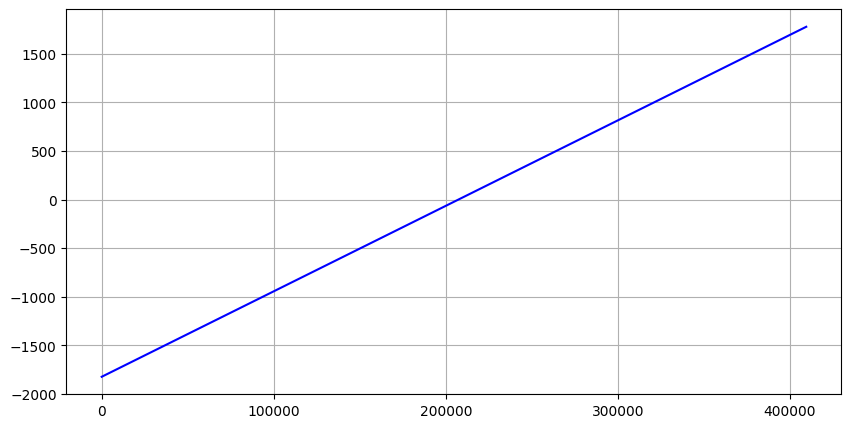

In [40]:
angulos = np.arange(-10*x_max, 10*x_max, 0.2)
ang_mod = []
t = []
cont = 0
for i in angulos:
    ang_mod.append(converte_escala(i, x_min=x_min, x_max=x_max, y_min=y_min, offset=528))
    t.append(cont)
    cont += 1

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# plt.plot(t, angulos, color="r")
plt.plot(t, ang_mod, color="b")
plt.grid()
plt.show()